## Scikit-Learn 官网实例练习

In [26]:
from sklearn import linear_model

In [27]:
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
reg.coef_

array([0.5, 0.5])

### Linear Regression Example

In [29]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Automatically created module for IPython interactive environment


In [30]:
# Load the diabetes dataset 糖尿病实例
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y = True)

In [53]:
# Use only one feature
diabates_X = diabetes_X[:, np.newaxis, 2]

In [70]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

(422, 10)
(20, 10)
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 11

In [33]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [34]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [35]:
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [37]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(diabetes_y_test, 
                                                     diabetes_y_pred))
# The coefficient of determination: 1 is prefect prediction
print('Cofficient of determination: %.2f' % r2_score(diabetes_y_test, 
                                                    diabetes_y_pred))

Coefficients: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
Mean squared error: 2004.57
Cofficient of determination: 0.59


In [50]:
diabetes_y_test

array([233.,  91., 111., 152., 120.,  67., 310.,  94., 183.,  66., 173.,
        72.,  49.,  64.,  48., 178., 104., 132., 220.,  57.])

ValueError: x and y must be the same size

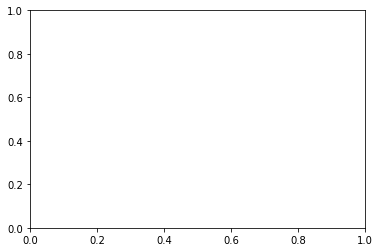

In [48]:
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## Ridge regression

In [1]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [2]:
reg.coef_

array([0.34545455, 0.34545455])

In [3]:
reg.intercept_

0.1363636363636364

## Plot Ridge coefficients as a function of the regularization

In [5]:
"""Plot Ridge coefficients as a function of the regression"""
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Plot Ridge coefficients as a function of the regression


In [24]:
# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)


In [27]:
# Compute paths

n_alphas = 200
alphas = np.logspace(-6, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha = a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

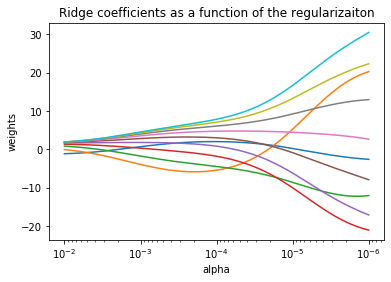

In [28]:
# Display results
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularizaiton')
plt.axis('tight')
plt.show()

## 交叉验证

In [38]:
"""Setting the regularization parameter: generalized Cross-Validation"""
print(__doc__)
reg = linear_model.RidgeCV(alphas = np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])

Setting the regularization parameter: generalized Cross-Validation


RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [40]:
reg.alpha_
help(linear_model.RidgeCV())
# Specifying the value of the cv attribute will trigger the use of cross-validation with GridSearchCV, for example cv=10 for 10-fold cross-validation, rather than Generalized Cross-Validatio

Help on RidgeCV in module sklearn.linear_model._ridge object:

class RidgeCV(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidgeCV)
 |  RidgeCV(alphas=(0.1, 1.0, 10.0), fit_intercept=True, normalize=False, scoring=None, cv=None, gcv_mode=None, store_cv_values=False)
 |  
 |  Ridge regression with built-in cross-validation.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  By default, it performs Generalized Cross-Validation, which is a form of
 |  efficient Leave-One-Out cross-validation.
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alphas : ndarray of shape (n_alphas,), default=(0.1, 1.0, 10.0)
 |      Array of alpha values to try.
 |      Regularization strength; must be a positive float. Regularization
 |      improves the conditioning of the problem and reduces the variance of
 |      the estimates. Larger values specify stronger regularization.
 |      Alpha corresponds to ``C^-

## Lasso

In [41]:
reg = linear_model.Lasso(alpha=0.1)
reg.fit([[0, 0], [1, 1]], [0, 1])
reg.predict([[1, 1]])

array([0.8])